In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
submission_directory = "/home/alex/Fastdata/plant-pathology-2020/submissions"

In [3]:
os.listdir(submission_directory)

['ens_rn3_a2_default.csv',
 'ens_rn3_a2_default_finetuned_32.csv',
 'ens_rn4_a3_default_8s.csv',
 'ens_rn1_a1_default.csv',
 'ens_rn2_a2_default.csv',
 'ens_rn3_a2_default_finetuned.csv',
 'ens_rn1_a2_default.csv']

In [4]:
dataframeslist = []
for filename in os.listdir(submission_directory):
    if 'rn3_a2_default_finetuned_32' in filename or 'ens_rn4_a3_default_8s' in filename:
        dataframeslist.append(pd.read_csv(os.path.join(submission_directory,"ens_rn1_a1_default.csv"),index_col='image_id'))

In [5]:
len(dataframeslist)

2

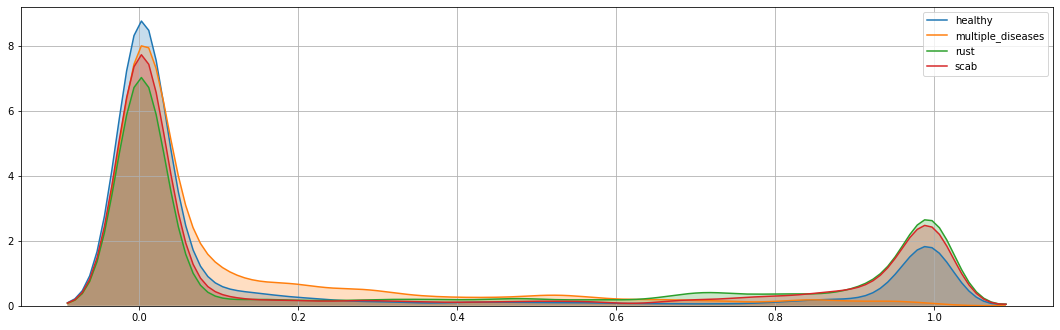

In [6]:
df = dataframeslist[0]

for name in df.columns:
    if name != 'image_id':        
        ax = sns.kdeplot(df[name],shade=True,bw=0.03)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)

In [7]:
df = dataframeslist[0]
for i in range(len(dataframeslist)-1):
    df = df + dataframeslist[i + 1]
df = df / len(dataframeslist)

In [8]:
df

,healthy,multiple_diseases,rust,scab
image_id,,,,
Test_0,0.000004,0.009551,0.990444,0.000001
Test_1,0.000267,0.001064,0.998660,0.000009
Test_2,0.002720,0.000047,0.000016,0.997217
Test_3,0.998395,0.000013,0.000640,0.000952
Test_4,0.000087,0.000941,0.998921,0.000051
...,...,...,...,...
Test_1816,0.000136,0.011865,0.987997,0.000003
Test_1817,0.000410,0.229243,0.018044,0.752303
Test_1818,0.000005,0.000720,0.999274,0.000002


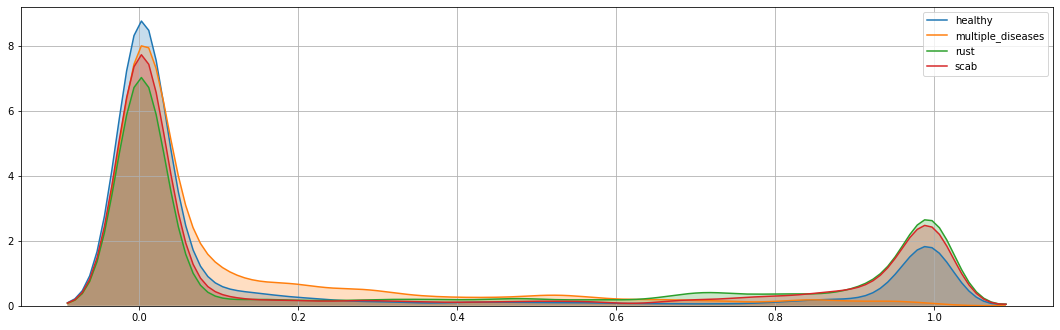

In [9]:
for name in df.columns:
    if name != 'image_id':        
        ax = sns.kdeplot(df[name],shade=True, bw=0.03)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)

In [10]:
df.to_csv(os.path.join(submission_directory,"../sum.csv"))